In [110]:
# import libraries
from bs4 import BeautifulSoup
import requests
import numpy as np
from time import sleep
from random import randint
import pandas as pd
import datetime
import re
import unicodedata
!pip install pycaret
!pip install catboost

# Preprocessing for models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
#from pycaret.classification import *
from sklearn.neighbors import KNeighborsRegressor
#from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV



# Model Performance
from sklearn import metrics 
from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer


In [44]:
df = pd.read_csv('/Users/kzhao/Downloads/celeb_dataset.csv')

In [45]:
df = df.drop(['Name', 'URL', 'Spouse'], axis = 1)

In [46]:
df

Sex    Birthday    Deathday  Children  Number of marriages  Married?  \
0       Male  1955-02-28  2022-04-12         2                    1         0   
1       Male  1971-12-03         NaN         0                    0         0   
2       Male  1976-08-25         NaN         0                    0         0   
3     Female  1995-03-30         NaN         0                    0         0   
4     Female  1995-01-09         NaN         0                    1         1   
...      ...         ...         ...       ...                  ...       ...   
9994  Female  1988-12-14         NaN         0                    0         0   
9995    Male         NaN         NaN         0                    0         0   
9996  Female         NaN         NaN         0                    1         1   
9997    Male  1977-01-13         NaN         0                    0         0   
9998    Male  1992-02-13         NaN         0                    0         0   

       Age  
0     67.0  
1     50.0  
2     45.0  
3     27.0  
4     27.0  
...    ...  
9994  33.0  
9995   NaN  
9996   NaN  
9997  45.0  
9998  30.0  

[9999 rows x 7 columns]

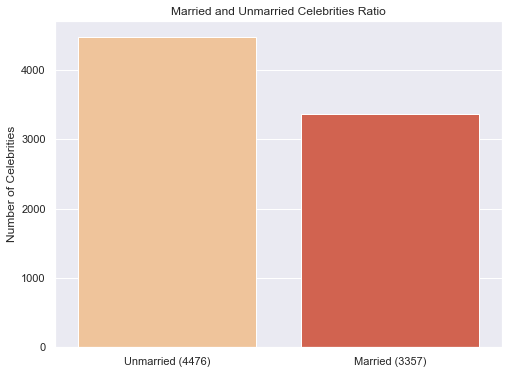

In [47]:
#EDA
# We are looking at percentage of alive celebs still married?
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.copy()
df1 = df1[df1['Age'] >= 18]
df2 = df1[df1['Deathday'].isnull()]
sum_of_unmarried = df2['Married?'].value_counts()[0]
sum_of_married = df2['Married?'].value_counts()[1]

plt.figure(figsize = (8,6))
sns.set_context('notebook', font_scale = 1)
sns.set_style('darkgrid')
sns.countplot(data =df2, x= 'Married?', palette = 'OrRd')

plt.title('Married and Unmarried Celebrities Ratio')
plt.ylabel('Number of Celebrities')
plt.xlabel('')
plt.xticks((0,1), ['Unmarried ({})'.format(sum_of_unmarried), "Married ({})".format(sum_of_married)])
plt.show()

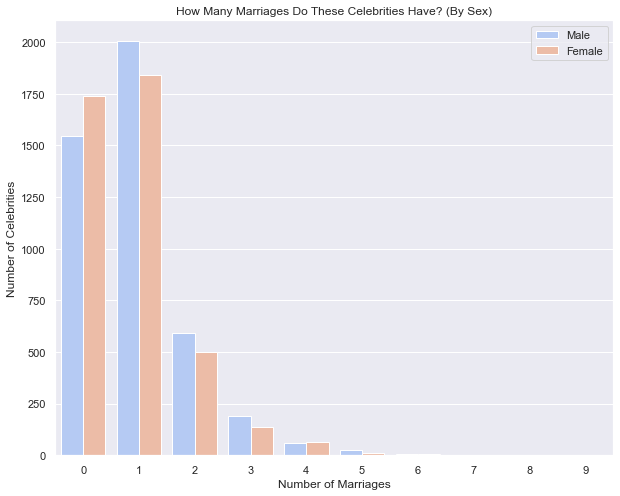

In [48]:
plt.figure(figsize = (10,8))
ax = sns.countplot(data = df1, x = 'Number of marriages', hue = 'Sex',palette='coolwarm')
ax.legend(loc = 'upper right')
plt.title('How Many Marriages Do These Celebrities Have? (By Sex)')
plt.ylabel('Number of Celebrities')
plt.xlabel('Number of Marriages')
plt.show()

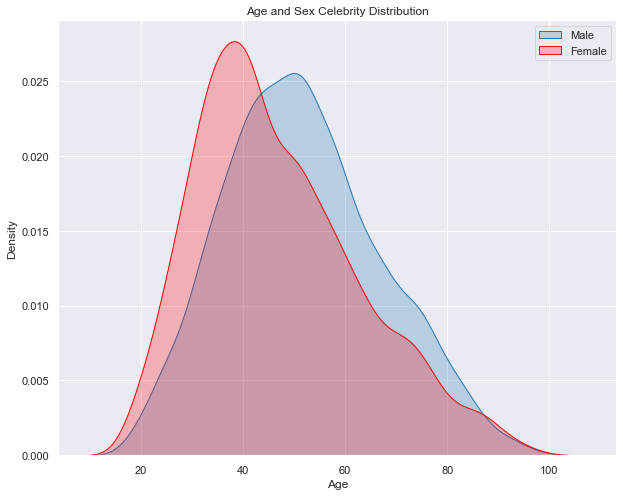

In [78]:
plt.figure(figsize = (10,8))
sns.kdeplot(data=df2[df2['Sex'] == 'Male'], x="Age", hue = 'Sex', shade=True, color="blue", label = 'Male')
sns.kdeplot(data=df2[df2['Sex'] == 'Female'], x="Age", shade=True, color="red", label = 'Female')
plt.legend()
plt.title('Age and Sex Celebrity Distribution')
plt.show()

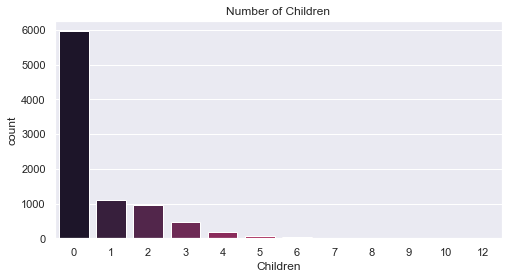

In [88]:
plt.figure(figsize = (8,4))
sns.countplot(data = df1, x = 'Children', palette = 'rocket')
plt.title('Number of Children')
plt.show()

In [91]:
df = df1[df1['Sex'].notnull()]
df

Sex    Birthday    Deathday  Children  Number of marriages  Married?  \
0       Male  1955-02-28  2022-04-12         2                    1         0   
1       Male  1971-12-03         NaN         0                    0         0   
2       Male  1976-08-25         NaN         0                    0         0   
3     Female  1995-03-30         NaN         0                    0         0   
4     Female  1995-01-09         NaN         0                    1         1   
...      ...         ...         ...       ...                  ...       ...   
9992    Male  1957-01-24         NaN         0                    2         1   
9993  Female  1979-01-06         NaN         0                    0         0   
9994  Female  1988-12-14         NaN         0                    0         0   
9997    Male  1977-01-13         NaN         0                    0         0   
9998    Male  1992-02-13         NaN         0                    0         0   

       Age  
0     67.0  
1     50.0  
2     45.0  
3     27.0  
4     27.0  
...    ...  
9992  65.0  
9993  43.0  
9994  33.0  
9997  45.0  
9998  30.0  

[8739 rows x 7 columns]

In [92]:
sex_dummies = pd.get_dummies(df['Sex'], drop_first=True)
df = df.drop(['Sex'], axis=1)
df = pd.concat([df, sex_dummies], axis=1)
df.head()

Birthday    Deathday  Children  Number of marriages  Married?   Age  Male
0  1955-02-28  2022-04-12         2                    1         0  67.0     1
1  1971-12-03         NaN         0                    0         0  50.0     1
2  1976-08-25         NaN         0                    0         0  45.0     1
3  1995-03-30         NaN         0                    0         0  27.0     0
4  1995-01-09         NaN         0                    1         1  27.0     0

In [96]:
df = df.drop(['Birthday', 'Deathday'], axis = 1)
df

Children  Number of marriages  Married?   Age  Male
0            2                    1         0  67.0     1
1            0                    0         0  50.0     1
2            0                    0         0  45.0     1
3            0                    0         0  27.0     0
4            0                    1         1  27.0     0
...        ...                  ...       ...   ...   ...
9992         0                    2         1  65.0     1
9993         0                    0         0  43.0     0
9994         0                    0         0  33.0     0
9997         0                    0         0  45.0     1
9998         0                    0         0  30.0     1

[8739 rows x 5 columns]

In [104]:
from sklearn.preprocessing import MinMaxScaler

df.reset_index(drop = True)
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

Children  Number of marriages  Married?       Age  Male
0  0.166667             0.111111       0.0  0.569767   1.0
1  0.000000             0.000000       0.0  0.372093   1.0
2  0.000000             0.000000       0.0  0.313953   1.0
3  0.000000             0.000000       0.0  0.104651   0.0
4  0.000000             0.111111       1.0  0.104651   0.0

In [106]:
feature = df.drop(columns = ['Married?'])
target = df['Married?']


X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [111]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

63.1

In [113]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

81.89

In [115]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

84.21

In [116]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

72.48

In [117]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

38.34

In [118]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

62.72

In [119]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

64.51

In [120]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

87.14

In [124]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

87.14

In [127]:
# xgboost

xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
Y_pred = xgboost.predict(X_test)
acc_xgboost = round(xgboost.score(X_train, y_train) * 100, 2)
acc_xgboost

84.89

In [126]:
# Catboost

catboost = CatBoostClassifier()
catboost.fit(X_train, y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, y_train) * 100, 2)
acc_catboost

Learning rate set to 0.023635
0:	learn: 0.6608227	total: 23.9ms	remaining: 23.9s
1:	learn: 0.6308511	total: 27.4ms	remaining: 13.7s
2:	learn: 0.6033684	total: 30.3ms	remaining: 10.1s
3:	learn: 0.5766707	total: 32.3ms	remaining: 8.04s
4:	learn: 0.5551234	total: 34.6ms	remaining: 6.88s
5:	learn: 0.5376024	total: 36.7ms	remaining: 6.07s
6:	learn: 0.5205609	total: 40.6ms	remaining: 5.75s
7:	learn: 0.5049223	total: 43.7ms	remaining: 5.42s
8:	learn: 0.4914624	total: 46.7ms	remaining: 5.14s
9:	learn: 0.4790261	total: 49.7ms	remaining: 4.92s
10:	learn: 0.4684433	total: 53.1ms	remaining: 4.77s
11:	learn: 0.4592507	total: 56.8ms	remaining: 4.67s
12:	learn: 0.4507428	total: 58.7ms	remaining: 4.46s
13:	learn: 0.4426224	total: 61.6ms	remaining: 4.34s
14:	learn: 0.4358088	total: 63.6ms	remaining: 4.18s
15:	learn: 0.4295035	total: 66.8ms	remaining: 4.11s
16:	learn: 0.4235564	total: 70.7ms	remaining: 4.09s
17:	learn: 0.4185744	total: 73.2ms	remaining: 3.99s
18:	learn: 0.4142066	total: 75.2ms	remaining

84.58

In [128]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'XGBoost', 'CatBoost'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_xgboost, acc_catboost]})
models.sort_values(by='Score', ascending=False)

Model  Score
3                Random Forest  87.14
8                Decision Tree  87.14
9                      XGBoost  84.89
10                    CatBoost  84.58
1                          KNN  84.21
0      Support Vector Machines  81.89
4                  Naive Bayes  72.48
6   Stochastic Gradient Decent  64.51
2          Logistic Regression  63.10
7                   Linear SVC  62.72
5                   Perceptron  38.34

In [133]:
models = {  'random_f':RandomForestClassifier(),
            'dec_tree': DecisionTreeClassifier(),
            'xgboost': XGBClassifier(),
            'catboost':CatBoostClassifier(),
            'KNN': KNeighborsClassifier()
          
    }

In [138]:
for name, model in models.items():
    model.fit(feature,target)
    print(name+ 'trained')

random_ftrained
dec_treetrained
xgboosttrained
Learning rate set to 0.025998
0:	learn: 0.6578243	total: 3.39ms	remaining: 3.39s
1:	learn: 0.6248837	total: 6.44ms	remaining: 3.21s
2:	learn: 0.5941611	total: 9.32ms	remaining: 3.1s
3:	learn: 0.5667879	total: 12.3ms	remaining: 3.06s
4:	learn: 0.5423036	total: 15.2ms	remaining: 3.03s
5:	learn: 0.5239892	total: 19.5ms	remaining: 3.23s
6:	learn: 0.5068563	total: 24.2ms	remaining: 3.43s
7:	learn: 0.4913361	total: 27.3ms	remaining: 3.38s
8:	learn: 0.4778532	total: 30.4ms	remaining: 3.35s
9:	learn: 0.4660569	total: 33.7ms	remaining: 3.34s
10:	learn: 0.4558364	total: 36.9ms	remaining: 3.32s
11:	learn: 0.4468476	total: 40.3ms	remaining: 3.32s
12:	learn: 0.4391340	total: 43.5ms	remaining: 3.31s
13:	learn: 0.4322844	total: 46.7ms	remaining: 3.29s
14:	learn: 0.4263665	total: 50ms	remaining: 3.29s
15:	learn: 0.4204590	total: 53.1ms	remaining: 3.27s
16:	learn: 0.4154701	total: 56.5ms	remaining: 3.27s
17:	learn: 0.4113981	total: 59.5ms	remaining: 3.24s


In [139]:
result = {}
kf = KFold(n_splits=10)
for name, model in models.items():
    results = cross_val_score(model,feature,target,scoring='accuracy',cv=kf)
    result[name] = results

Learning rate set to 0.024854
0:	learn: 0.6566949	total: 2.84ms	remaining: 2.84s
1:	learn: 0.6259162	total: 6.05ms	remaining: 3.02s
2:	learn: 0.5968489	total: 9.74ms	remaining: 3.24s
3:	learn: 0.5702336	total: 13.5ms	remaining: 3.36s
4:	learn: 0.5467818	total: 16.6ms	remaining: 3.31s
5:	learn: 0.5292458	total: 19.7ms	remaining: 3.26s
6:	learn: 0.5119052	total: 24.9ms	remaining: 3.53s
7:	learn: 0.4967485	total: 27.7ms	remaining: 3.43s
8:	learn: 0.4838602	total: 31.1ms	remaining: 3.42s
9:	learn: 0.4721308	total: 34.1ms	remaining: 3.38s
10:	learn: 0.4611254	total: 38.6ms	remaining: 3.47s
11:	learn: 0.4521635	total: 41.5ms	remaining: 3.41s
12:	learn: 0.4442910	total: 44.5ms	remaining: 3.38s
13:	learn: 0.4373632	total: 48.1ms	remaining: 3.39s
14:	learn: 0.4313558	total: 51.6ms	remaining: 3.39s
15:	learn: 0.4253160	total: 54.6ms	remaining: 3.36s
16:	learn: 0.4201377	total: 57.4ms	remaining: 3.32s
17:	learn: 0.4155922	total: 60.4ms	remaining: 3.29s
18:	learn: 0.4114722	total: 63.7ms	remaining

In [140]:
for name, result in result.items():
    print(name + '\n---------')
    print(np.mean(result))
    print(np.std(result))

random_f
---------
0.7978035444205913
0.010041849416091358
dec_tree
---------
0.7910524480931899
0.013332222014402343
xgboost
---------
0.8094746802760675
0.010314784781700472
catboost
---------
0.8132502929219058
0.00967804294497378
KNN
---------
0.7909368520659186
0.012339567442346345


In [141]:
parameters = {
    'n_estimators':[5,10,20,50,250],
    'max_depth':[1,3,5,7,9],
    'learning_rate':[0.01,0.05,0.1]
}


catboost = GridSearchCV(CatBoostClassifier(), parameters, cv=10)


catboost.fit(feature, target)

0:	learn: 0.6891938	total: 754us	remaining: 3.02ms
1:	learn: 0.6853073	total: 2.15ms	remaining: 3.23ms
2:	learn: 0.6814996	total: 3.35ms	remaining: 2.23ms
3:	learn: 0.6777606	total: 4.56ms	remaining: 1.14ms
4:	learn: 0.6741048	total: 5.67ms	remaining: 0us
0:	learn: 0.6891201	total: 949us	remaining: 3.8ms
1:	learn: 0.6851683	total: 2.16ms	remaining: 3.24ms
2:	learn: 0.6813175	total: 3.38ms	remaining: 2.25ms
3:	learn: 0.6775212	total: 5.92ms	remaining: 1.48ms
4:	learn: 0.6738001	total: 6.79ms	remaining: 0us
0:	learn: 0.6891018	total: 904us	remaining: 3.62ms
1:	learn: 0.6851396	total: 2.11ms	remaining: 3.16ms
2:	learn: 0.6812647	total: 3.27ms	remaining: 2.18ms
3:	learn: 0.6774596	total: 4.51ms	remaining: 1.13ms
4:	learn: 0.6737221	total: 5.47ms	remaining: 0us
0:	learn: 0.6891356	total: 906us	remaining: 3.63ms
1:	learn: 0.6852010	total: 2.65ms	remaining: 3.97ms
2:	learn: 0.6813534	total: 3.53ms	remaining: 2.35ms
3:	learn: 0.6775676	total: 5.25ms	remaining: 1.31ms
4:	learn: 0.6738676	total:

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f7f20a8deb0>,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 10, 20, 50, 250]})

In [142]:
print(catboost.score(feature, target))
print(catboost.best_params_)

0.8211465842773773
{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}


In [143]:
catboost = CatBoostClassifier(learning_rate = 0.1, max_depth = 1, n_estimators = 250)
catboost.fit(feature, target)
pred = catboost.predict(feature)
print(classification_report(target, pred))

0:	learn: 0.5655189	total: 2.21ms	remaining: 551ms
1:	learn: 0.4972276	total: 6.4ms	remaining: 794ms
2:	learn: 0.4619336	total: 8.88ms	remaining: 731ms
3:	learn: 0.4578817	total: 11.9ms	remaining: 731ms
4:	learn: 0.4390977	total: 15ms	remaining: 734ms
5:	learn: 0.4350440	total: 16.6ms	remaining: 677ms
6:	learn: 0.4315299	total: 17.9ms	remaining: 623ms
7:	learn: 0.4286533	total: 19.5ms	remaining: 591ms
8:	learn: 0.4261639	total: 22.1ms	remaining: 592ms
9:	learn: 0.4240759	total: 24.6ms	remaining: 589ms
10:	learn: 0.4221946	total: 26.8ms	remaining: 583ms
11:	learn: 0.4206368	total: 29ms	remaining: 576ms
12:	learn: 0.4191825	total: 31.3ms	remaining: 570ms
13:	learn: 0.4074750	total: 33.7ms	remaining: 568ms
14:	learn: 0.4055111	total: 35.6ms	remaining: 558ms
15:	learn: 0.4039097	total: 48.1ms	remaining: 704ms
16:	learn: 0.4023720	total: 50.3ms	remaining: 690ms
17:	learn: 0.4013103	total: 52.7ms	remaining: 680ms
18:	learn: 0.4001647	total: 54.8ms	remaining: 666ms
19:	learn: 0.3992415	total: